# **Boston House Market Price Prediction**

## Context
Housing is one of human life's most essential needs, alongside food, water, and other fundamentals. The demand for housing has grown rapidly over the years as people's living standards have improved. Housing markets also have a significant impact on a country's economy and currency. Various factors determine housing sales prices, including the area of the property, location, construction materials, age, number of bedrooms, and garages.

A house-price prediction model can benefit home buyers, property investors, and housebuilders by providing valuable insights into current market valuations. This model can help buyers identify the features they want within their budget and assist investors and builders in making informed decisions.

## Objective
The goal of this project is to predict housing prices in a town or suburb based on the provided locality features. I will identify the most important features affecting house prices, preprocess the data, and build a linear regression model to predict prices for unseen data.

## Data Dictionary
Each record in the dataset describes a suburb or town in Boston from the 1970 Boston Standard Metropolitan Statistical Area (SMSA). The dataset includes the following attributes:

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric Oxide concentration (parts per 10 million)
- **RM**: The average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built before 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property-tax rate per 10,000 dollars
- **PTRATIO**: Pupil-teacher ratio by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000 dollars

## Machine Learning Model Selection and Justification
For this project, I will start with a **Linear Regression** model. This model is chosen because it is straightforward to implement and interpret, making it suitable for understanding the relationships between housing prices and various features. Linear Regression will help determine how well the features predict housing prices and provide insight into the importance of each feature.

I may also consider additional models such as **Ridge Regression** and **Lasso Regression** to handle any potential issues with multicollinearity and feature selection. Ridge Regression can help by adding a penalty for larger coefficients, while Lasso Regression can assist in feature selection by shrinking some coefficients to zero.

The choice of models will be justified based on their performance metrics and their ability to handle the dataset's characteristics effectively.


In [1]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load in the dataset
boston= pd.read_csv('/content/drive/My Drive/Boston.csv')

# View the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
# View the shape and data types
print('The shape of the dataset:\n', boston.shape)
print('------------------------------------')
print('The data types are: \n', boston.dtypes)

The shape of the dataset:
 (506, 13)
------------------------------------
The data types are: 
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is an essential step in any data science project. It involves analyzing the dataset to understand its structure, detect patterns, and identify any anomalies. In this project, I will conduct a thorough EDA to gain insights into the Boston housing data, which will inform the data preprocessing and modeling strategies.

### Steps for EDA

1. **Distribution of 'MEDV'**

   **Objective**: To examine the distribution of the target variable `MEDV` (Median value of owner-occupied homes in $1000s).
   
   **Purpose**: Understanding the distribution of `MEDV` helps to identify the central tendency, spread, and any potential skewness or outliers in house prices. This information is crucial for determining if any transformations are needed for the target variable.

2. **Correlation Heatmap**

   **Objective**: To analyze the correlation between `MEDV` and other features, as well as the relationships among features.
   
   **Purpose**: The correlation heatmap will reveal how strongly each feature correlates with `MEDV` and with other features. Identifying strong correlations helps in understanding which features are most influential in predicting house prices and can guide feature selection and engineering.

3. **Univariate Analysis**

   **Objective**: To perform a detailed analysis of each feature individually.
   
   **Purpose**: By examining the distribution, range, and characteristics of each feature, I can identify patterns, potential outliers, and skewness. This analysis will help to decide on necessary preprocessing steps such as scaling, transformation, or handling missing values.

4. **Bivariate Analysis**

   **Objective**: To explore the relationships between features that have significant correlations (>= 0.7 or <= -0.7) with each other and with `MEDV`.
   
   **Purpose**: Bivariate analysis helps to visualize and understand how features interact with each other and with the target variable. This can provide insights into feature relationships and help identify any potential multicollinearity or interactions that should be addressed in the modeling process.

By following these steps, I aim to thoroughly understand the dataset and prepare it for the next phases of data preprocessing and model building. Each step will provide valuable insights that will guide the right approach to handling the data and building an effective predictive model.


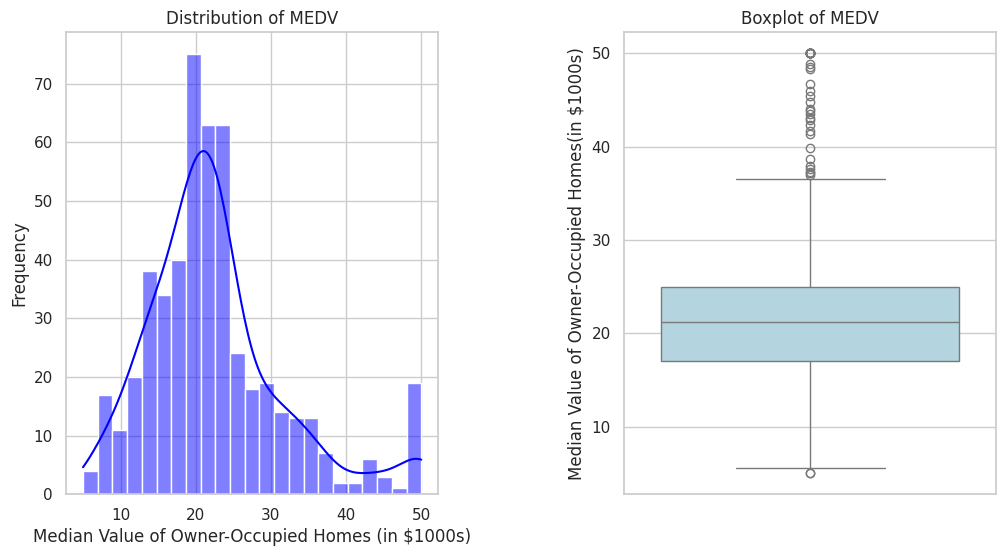

In [5]:
# Step 1- Distribution of 'MEDV'. Set the style of the plot
sns.set(style= 'whitegrid')

# Plot Figure
plt.figure(figsize= (12,6))

# 'MEDV' Histogram
plt.subplot(1, 2, 1)
sns.histplot(boston['MEDV'], kde= True, color= 'blue')
plt.xlabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')

# 'MEDV' Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y= boston['MEDV'], color= 'lightblue')
plt.ylabel('Median Value of Owner-Occupied Homes(in $1000s)')
plt.title('Boxplot of MEDV')

# Adjust the layout
plt.subplots_adjust(wspace= 0.5)
plt.show()

### **Analysis of 'MEDV' Distribution**

**Distribution of MEDV**:
- The histogram shows that the median value of owner-occupied homes (`MEDV`) ranges from approximately \$5,000 to \$50,000.
- The distribution appears to be slightly right-skewed, indicating that while most homes are priced below \$30,000, there are some higher-valued homes pushing the distribution to the right.
- The presence of a KDE (Kernel Density Estimate) curve helps to visualize the overall shape of the data distribution more clearly.

**Boxplot of MEDV**:
- The boxplot confirms the skewness observed in the histogram, with a longer whisker extending towards higher values.
- The median house price is around \$21,000.
- Several outliers are present above the \$35,000 mark. These could be properties in particularly desirable locations or with exceptionally good features.
- The interquartile range (IQR) is concentrated between approximately \$17,000 and \$25,000, indicating that the middle 50% of house prices fall within this range.

**Key Insights**:
- The slight right skewness in the distribution of `MEDV` suggests that most houses are relatively affordable, with a few high-priced outliers.
- The presence of outliers indicates variability in house prices, which may be influenced by factors such as location, amenities, and property characteristics.
- Understanding this distribution is crucial for further analysis and preprocessing steps, such as deciding whether to apply transformations to normalize the target variable.

These insights will guide the next steps in the analysis and preprocessing, ensuring that the target variable and any outliers present are handled appropriately.


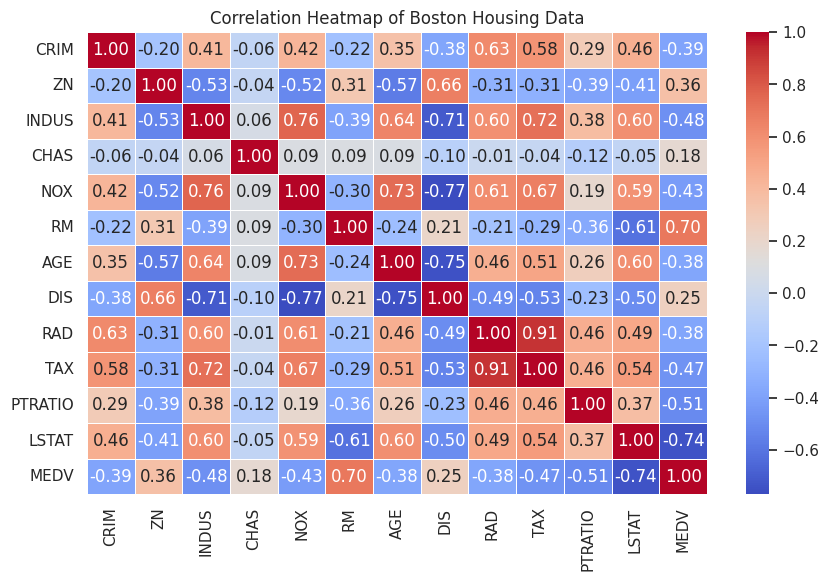

In [6]:
# Step 2- Correlation Matrix
corr_matrix= boston.corr()

# Heatmap
plt.figure(figsize= (10,6))
sns.heatmap(corr_matrix, annot= True, fmt= '.2f', cmap= 'coolwarm', linewidths= 0.5)
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()

### **Analysis of Correlation Heatmap**

The correlation heatmap provides valuable insights into the relationships between various features in the Boston housing dataset, particularly in relation to the target variable `MEDV` (Median value of owner-occupied homes in $1000s).

**Key Insights**:

1. **Strong Positive Correlations with `MEDV`**:
   - `RM` (0.70): The average number of rooms per dwelling has a strong positive correlation with `MEDV`. This clearly suggests that houses with more rooms tend to have higher prices.
   
2. **Strong Negative Correlations with `MEDV`**:
   - `LSTAT` (-0.74): The percentage of the lower status of the population has a strong negative correlation with `MEDV`. Higher percentages of lower status populations are associated with lower house prices.
   - `PTRATIO` (-0.51): The pupil-teacher ratio by town has a moderately strong negative correlation with `MEDV`. Higher pupil-teacher ratios are associated with lower house prices.
   - `NOX` (-0.43): Nitric oxide concentration (pollution levels) also shows a negative correlation with `MEDV`. Higher pollution levels are associated with lower house prices.

3. **Other Notable Correlations**:
   - `DIS` (-0.38): Weighted distances to five Boston employment centers have a moderate negative correlation with `MEDV`. Houses further from employment centers tend to have lower prices.
   - `CRIM` (-0.39): Per capita crime rate has a moderate negative correlation with `MEDV`. Higher crime rates are associated with lower house prices.

4. **Inter-feature Correlations**:
   - `TAX` and `RAD` (0.91): There is a very strong positive correlation between the full-value property-tax rate and the index of accessibility to radial highways. This indicates that areas with higher property taxes also tend to be more accessible by highways.
   - `DIS` and `NOX` (-0.77): There is a strong negative correlation between the distance to employment centers and nitric oxide concentration. Areas closer to employment centers tend to have higher pollution levels.

These insights highlight which features are most influential in predicting house prices and suggest potential areas for feature engineering and selection. For instance, the number of rooms (`RM`), percentage of the lower status of the population (`LSTAT`), and pupil-teacher ratio (`PTRATIO`) are particularly important features to consider in the predictive model.


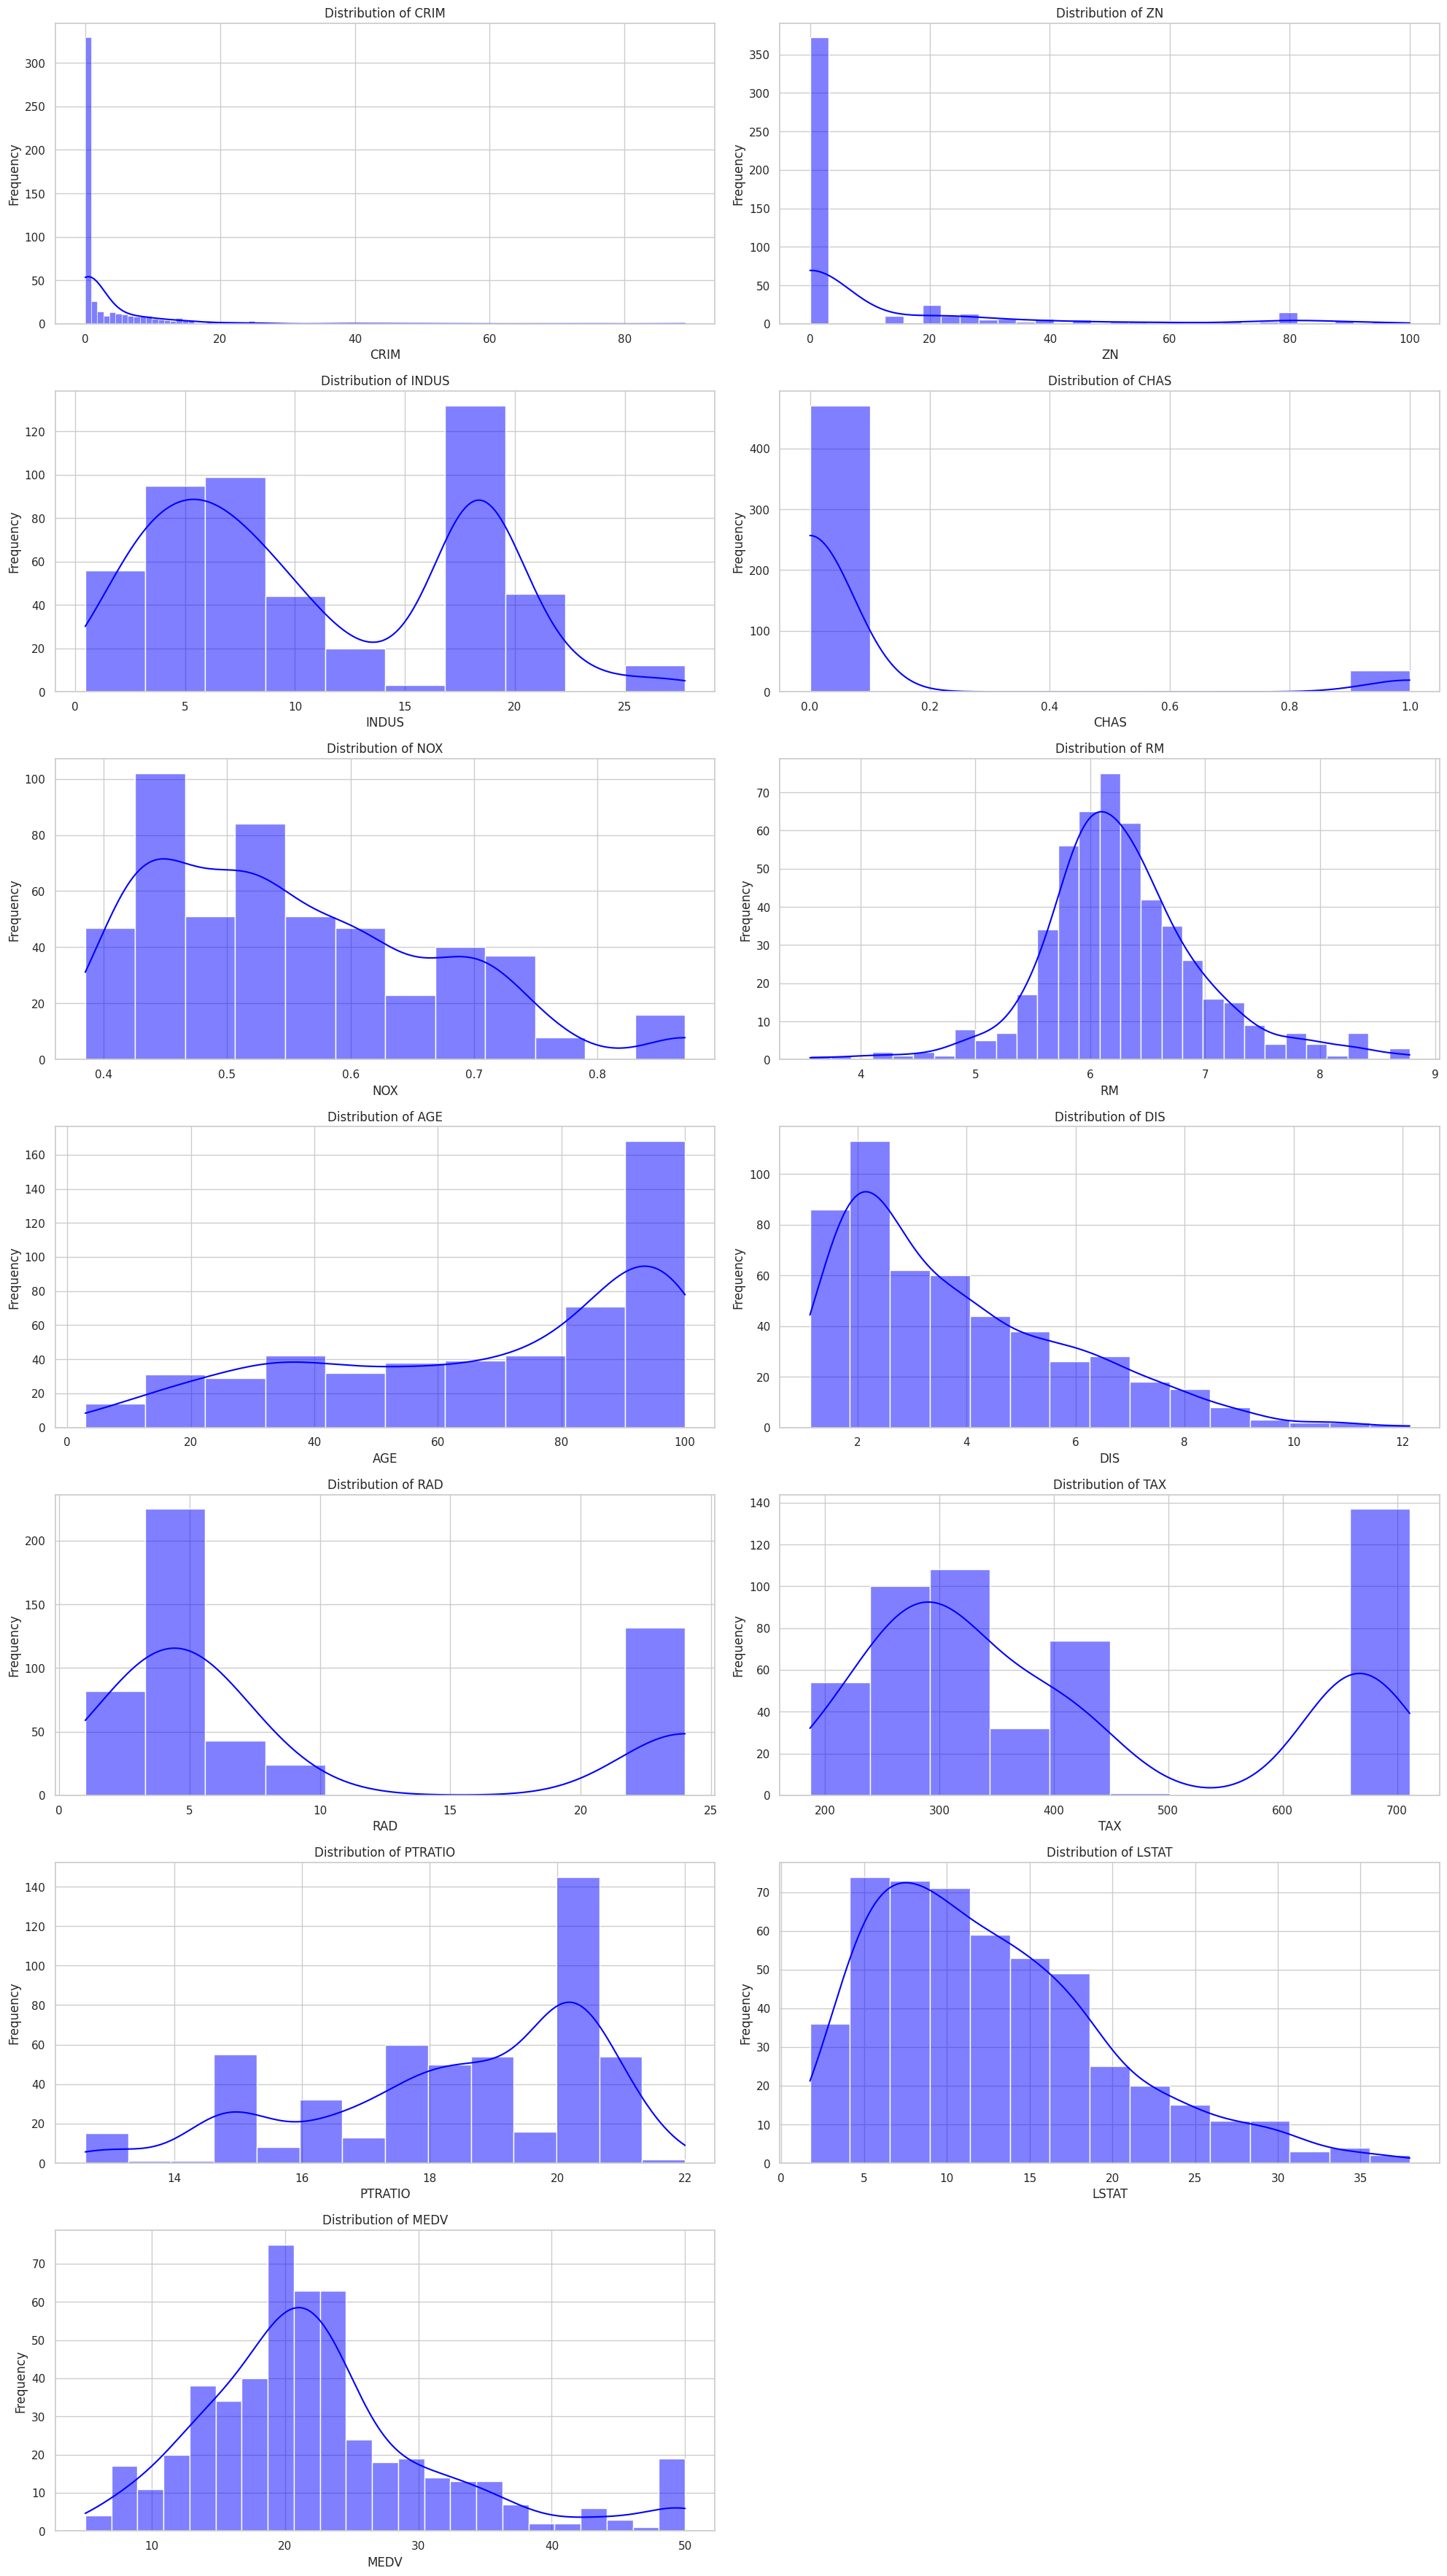

In [7]:
# Step 3- Univariate Analysis. Set the style of the plot
sns.set(style= 'whitegrid')

# List of features to analyze
features= boston.columns

# Plot Figure
plt.figure(figsize= (20,40))

# Loop through each feature and create a subplot
for i, feature in enumerate(features):
  plt.subplot(8, 2, i+1)
  sns.histplot(boston[feature], kde= True, color= 'blue')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

### **Univariate Analysis Plots**

The univariate analysis of each feature in the Boston housing dataset reveals important insights into their distributions, ranges, and characteristics.

**1. CRIM (Per capita crime rate by town):**
- The distribution is highly skewed to the right, with most values concentrated near zero.
- There are a few high crime rate values, indicating potential outliers.

**2. ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.):**
- The distribution is also highly skewed to the right, with many zero values.
- This suggests that a significant number of areas have no large residential lots.

**3. INDUS (Proportion of non-retail business acres per town):**
- The distribution shows multiple peaks, indicating that the industrial zoning varies widely across towns.

**4. CHAS (Charles River dummy variable):**
- The distribution is highly imbalanced, with most values being zero.
- Very few tracts bound the river, making this a rare feature.

**5. NOX (Nitric oxide concentration):**
- The distribution is fairly uniform with a slight right skew.
- Most areas have moderate levels of nitric oxide concentration.

**6. RM (Average number of rooms per dwelling):**
- The distribution is slightly right-skewed, with a peak around 6 rooms.
- There are a few houses with a very high number of rooms.

**7. AGE (Proportion of owner-occupied units built before 1940):**
- The distribution is bimodal, with peaks around 20 and 90.
- Indicates that there are two main groups of housing: very old and moderately aged.

**8. DIS (Weighted distances to five Boston employment centers):**
- The distribution is right-skewed, indicating that most houses are located relatively close to employment centers.
- A few houses are located far from employment centers, potentially outliers.

**9. RAD (Index of accessibility to radial highways):**
- The distribution shows a high concentration at lower values, with a few very high values.
- Indicates that most areas have low accessibility, with a few highly accessible areas.

**10. TAX (Full-value property-tax rate per 10,000 dollars):**
- The distribution is bimodal, with peaks around 300 and 700.
- Indicates two main tax rate groups.

**11. PTRATIO (Pupil-teacher ratio by town):**
- The distribution is slightly left-skewed, with most values around 20.
- Indicates that most towns have similar pupil-teacher ratios.

**12. LSTAT (% lower status of the population):**
- The distribution is right-skewed, indicating that most areas have a lower percentage of lower status population.
- A few areas have very high percentages, indicating potential outliers.

**13. MEDV (Median value of owner-occupied homes in $1000s):**
- The distribution is right-skewed, with most house prices below \$30,000.
- There are a few high-value outliers, pushing the distribution to the right.

### Key Insights:
- **Skewness and Outliers**: Several features (e.g., `CRIM`, `ZN`, `DIS`, `LSTAT`) exhibit significant skewness and contain outliers. These will need to be addressed through transformations and outlier handling in the preprocessing step.
- **Bimodal Distributions**: Features like `AGE` and `TAX` have bimodal distributions, suggesting the presence of distinct groups within the data.
- **Imbalanced Feature**: The `CHAS` feature is highly imbalanced, which may impact its usefulness in modeling.

These insights provide a foundation for the next steps in data preprocessing, ensuring that the features are handled appropriately to improve the accuracy and robustness of the predictive model.


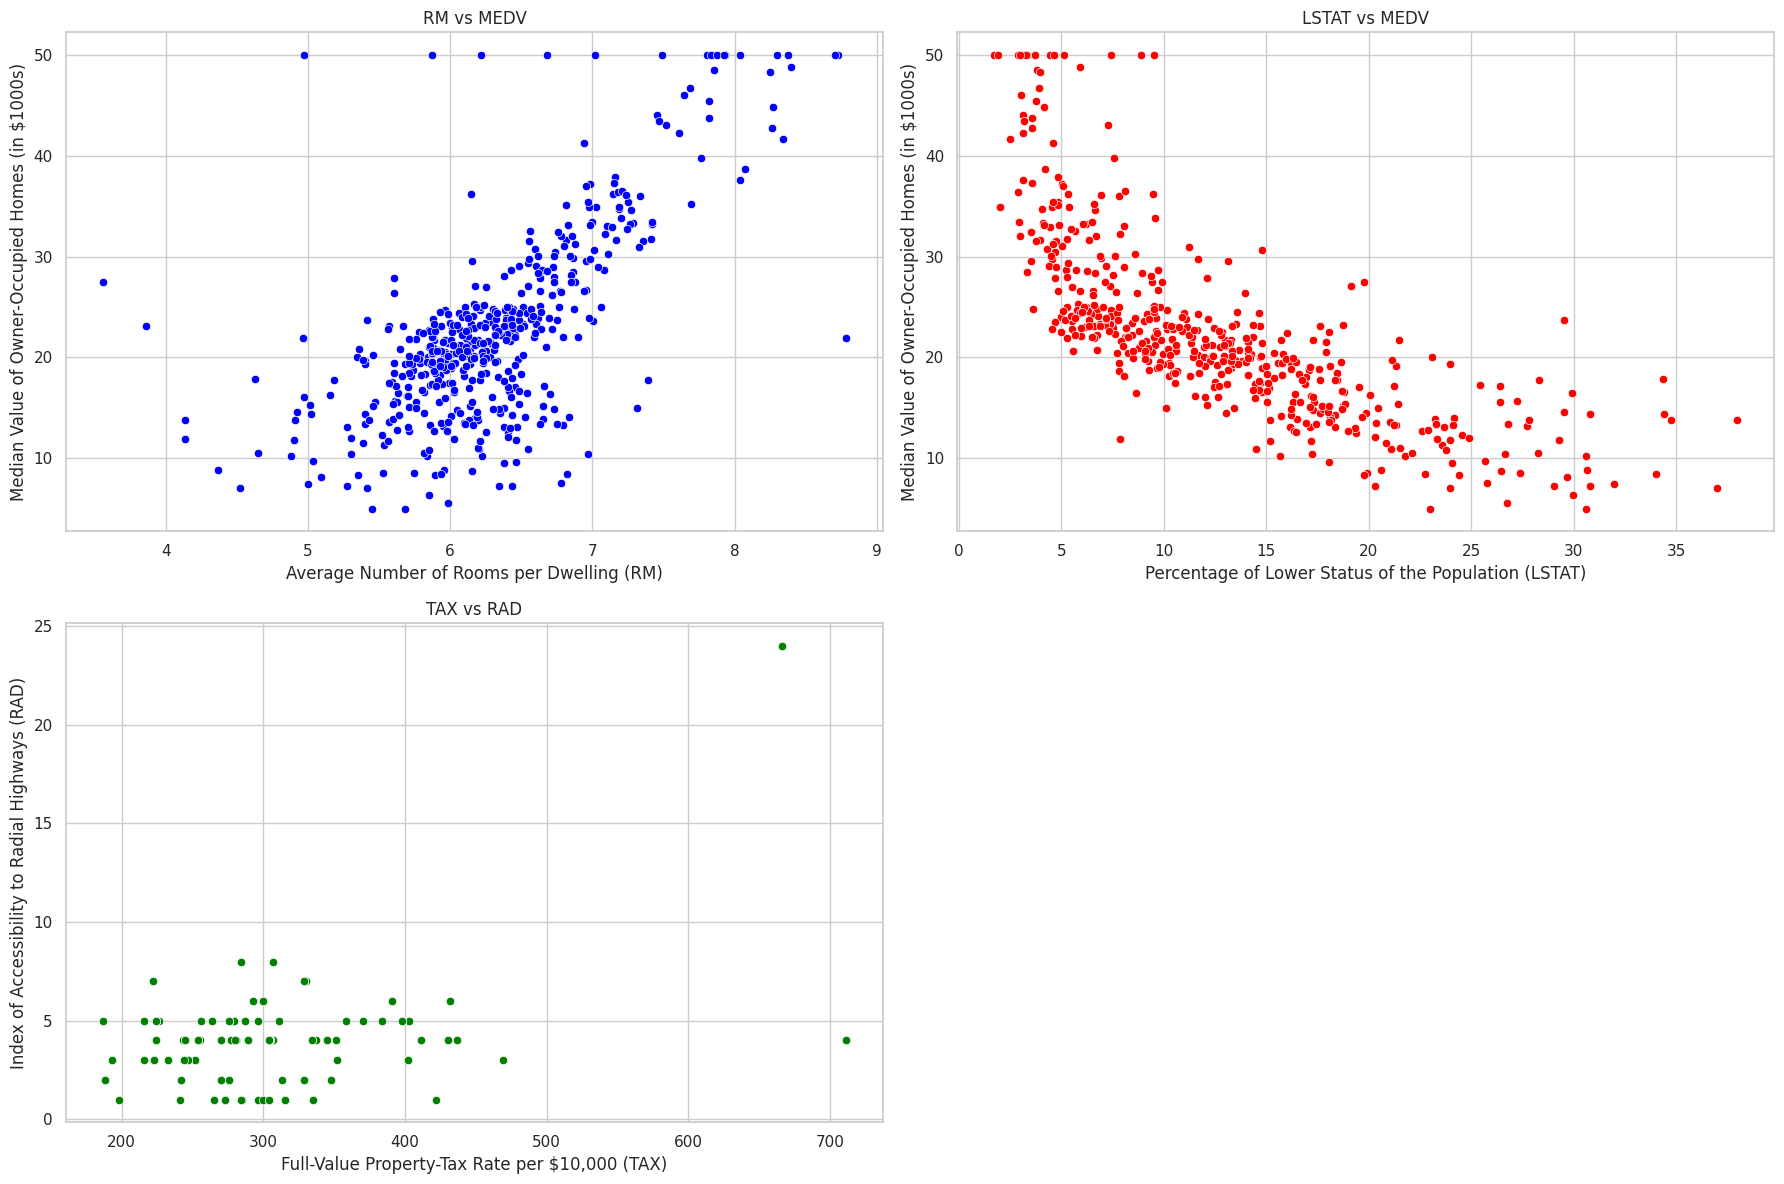

In [8]:
# Step 4- Bivariate Analysis. Set the style of the plots
sns.set(style= 'whitegrid')

# Plot Figure
plt.figure(figsize= (18,12))

# 'RM' vs 'MEDV'
plt.subplot(2, 2, 1)
sns.scatterplot(data= boston, x= 'RM', y= 'MEDV', color= 'blue')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.title('RM vs MEDV')

# 'LSTAT' vs 'MEDV'
plt.subplot(2, 2, 2)
sns.scatterplot(data= boston, x= 'LSTAT', y= 'MEDV', color= 'red')
plt.xlabel('Percentage of Lower Status of the Population (LSTAT)')
plt.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.title('LSTAT vs MEDV')

# 'TAX' vs 'RAD'
plt.subplot(2, 2, 3)
sns.scatterplot(data= boston, x= 'TAX', y= 'RAD', color= 'green')
plt.xlabel('Full-Value Property-Tax Rate per $10,000 (TAX)')
plt.ylabel('Index of Accessibility to Radial Highways (RAD)')
plt.title('TAX vs RAD')

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis

**Objective**: To explore the relationships between features that have significant correlations (>= 0.7 or <= -0.7) with each other and with `MEDV`.

**Purpose**: Bivariate analysis helps to visualize and understand how features interact with each other and with the target variable. This can provide insights into feature relationships and help identify any potential multicollinearity or interactions that should be addressed in the modeling process.

#### Scatter Plots:

1. **RM vs MEDV**:
    - The scatter plot shows a positive correlation between the average number of rooms per dwelling (`RM`) and the median value of owner-occupied homes (`MEDV`).
    - As the number of rooms increases, the median value of homes also tends to increase.
    - This confirms the positive correlation observed in the correlation heatmap, indicating that houses with more rooms are generally more expensive.

2. **LSTAT vs MEDV**:
    - The scatter plot shows a negative correlation between the percentage of the lower status of the population (`LSTAT`) and the median value of owner-occupied homes (`MEDV`).
    - As the percentage of lower status population increases, the median value of homes decreases.
    - This confirms the negative correlation observed in the correlation heatmap, indicating that areas with higher percentages of lower status populations tend to have lower house prices.

3. **TAX vs RAD**:
    - The scatter plot shows a strong positive correlation between the full-value property-tax rate (`TAX`) and the index of accessibility to radial highways (`RAD`).
    - As the property-tax rate increases, the index of accessibility to radial highways also increases.
    - This confirms the strong positive correlation observed in the correlation heatmap, indicating that areas with higher property taxes tend to have better accessibility to highways.

### Key Insights:
- **Positive Correlation (RM and MEDV)**: There is a strong positive relationship between the number of rooms in a house and its median value. This suggests that `RM` is a very important feature for predicting house prices.
- **Negative Correlation (LSTAT and MEDV)**: There is a strong negative relationship between the percentage of the lower status population and the median value of homes. This suggests that `LSTAT` is a significant feature that negatively impacts house prices.
- **Positive Correlation (TAX and RAD)**: The strong positive relationship between property-tax rates and accessibility to highways suggests that these two features are closely related. This may indicate potential multicollinearity, which should be addressed during the modeling process.

These insights provide a deeper understanding of how these features interact with each other and with the target variable.


In [9]:
# Check for missing values
missing_values= boston.isnull().sum()
print('Missing values in each feature:\n', missing_values)

Missing values in each feature:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


### **Skewness Check and Log Transformation of the Target Variable**

**Objective**: To check the skewness of the target variable `MEDV` and apply a log transformation if necessary.

**Purpose**: Skewness can affect the performance of machine learning models. A skewed distribution can lead to biased predictions. By normalizing the distribution, the model performance can be improved.

I'll begin by checking the skewness of the target feature `MEDV`. Skewness measures the asymmetry of the data distribution. A skewness value between -0.5 and 0.5 indicates a relatively symmetric distribution. Values outside this range indicate skewness: negative skewness (< -0.5) means the left tail is longer or fatter, and positive skewness (> 0.5) means the right tail is longer or fatter. If the skewness is larger than these values, I will apply a log transformation to normalize its distribution.



In [10]:
# Check skewness of the target feature 'MEDV'
skewness_medv= boston['MEDV'].skew()
print(f'Skewness of MEDV: {skewness_medv}')

Skewness of MEDV: 1.1080984082549072


- The skewness of `MEDV` is 1.108, which indicates a significant right skew. I will proceed to apply a log transformation to normalize its distribution.

Log transformation applied to MEDV


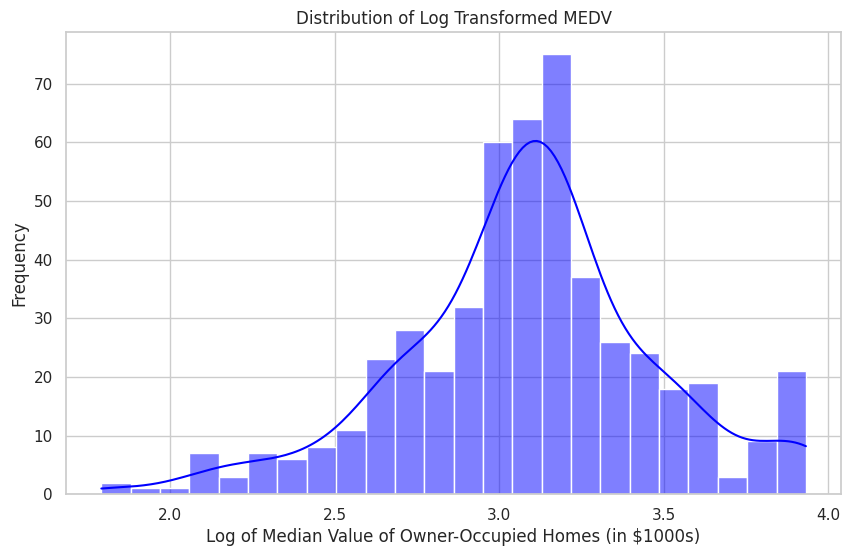

In [11]:
# Apply log transformation
boston['MEDV_log']= np.log1p(boston['MEDV'])
print('Log transformation applied to MEDV')

# Plot the transformed 'MEDV_log' to verify the distribution
plt.figure(figsize= (10,6))
sns.histplot(boston['MEDV_log'], kde= True, color= 'blue')
plt.xlabel('Log of Median Value of Owner-Occupied Homes (in $1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed MEDV')
plt.show()

- The log transformation has successfully normalized the distribution of the `MEDV` variable. The distribution of `MEDV_log` appears more symmetric and closer to a normal distribution.

### **Feature Engineering**

In the following feature engineering step, I performed several transformations to enhance the predictive power of the dataset.

First, I created polynomial features for `LSTAT` to capture non-linear relationships by generating a new feature `LSTAT_squared`. I then dropped the original `LSTAT` column as its information is now represented by the polynomial features.

Next, I addressed the skewness in the `CRIM` and `DIS` features by applying log transformations, resulting in new features `CRIM_log` and `DIS_log` I created interaction features `CRIM_LSTAT` and `AGE_LSTAT` to capture the combined effects of `CRIM_log` and `AGE` with `LSTAT_squared`.

Additionally, I also binned the `AGE` feature into categorical groups (`New`, `Moderate`, `Old`) to simplify the analysis and encoded these categories into dummy variables for modeling.

These transformations ensure that our features are more informative and suitable for building robust predictive models. Below is the code used for these feature engineering steps:


In [12]:
# Feature Engineering. Create polynomial features for 'LSTAT'
poly= PolynomialFeatures(degree= 2, include_bias= False)
lstat_poly= poly.fit_transform(boston[['LSTAT']])
lstat_poly_df= pd.DataFrame(lstat_poly, columns= ['LSTAT', 'LSTAT_squared'])
boston= pd.concat([boston, lstat_poly_df], axis= 1)

# Drop original 'LSTAT'
boston.drop(['LSTAT'], axis=1, inplace=True)

# Log transformation of skewed features
boston['CRIM_log']= np.log1p(boston['CRIM'])
boston['DIS_log']= np.log1p(boston['DIS'])
boston.drop(['CRIM', 'DIS'], axis= 1, inplace= True)

# Create interaction features
boston['CRIM_LSTAT']= boston['CRIM_log'] * boston['LSTAT_squared']
boston['AGE_LSTAT']= boston['AGE'] * boston['LSTAT_squared']

# Binning 'AGE' into categories
boston['AGE_group']= pd.cut(boston['AGE'], bins= [0, 20, 80, 100], labels= ['New', 'Moderate', 'Old'])

# Encoding categorical features
boston= pd.get_dummies(boston, columns= ['AGE_group'], drop_first= True)

# Verify the DataFrame after feature engineering
print("Feature engineering applied successfully. Here are the first few rows:")
print(boston.head())

Feature engineering applied successfully. Here are the first few rows:
     ZN  INDUS  CHAS    NOX     RM   AGE  RAD  TAX  PTRATIO  MEDV  MEDV_log  \
0  18.0   2.31     0  0.538  6.575  65.2    1  296     15.3  24.0  3.218876   
1   0.0   7.07     0  0.469  6.421  78.9    2  242     17.8  21.6  3.117950   
2   0.0   7.07     0  0.469  7.185  61.1    2  242     17.8  34.7  3.575151   
3   0.0   2.18     0  0.458  6.998  45.8    3  222     18.7  33.4  3.538057   
4   0.0   2.18     0  0.458  7.147  54.2    3  222     18.7  36.2  3.616309   

   LSTAT_squared  CRIM_log   DIS_log  CRIM_LSTAT   AGE_LSTAT  \
0        24.8004  0.006300  1.627278    0.156245  1616.98608   
1        83.5396  0.026944  1.786261    2.250869  6591.27444   
2        16.2409  0.026924  1.786261    0.437274   992.31899   
3         8.6436  0.031857  1.954757    0.275360   395.87688   
4        28.4089  0.066770  1.954757    1.896874  1539.76238   

   AGE_group_Moderate  AGE_group_Old  
0                True         

In [13]:
# Define a function to detect outliers using IQR
def detect_outliers(df):
    outliers= {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Apply only to numerical columns
            Q1= df[column].quantile(0.25)
            Q3= df[column].quantile(0.75)
            IQR= Q3 - Q1
            lower_bound= Q1 - 1.5 * IQR
            upper_bound= Q3 + 1.5 * IQR
            outliers[column]= df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers in the dataset
outliers= detect_outliers(boston)
for column, outlier_values in outliers.items():
    print(f"{column}: {len(outlier_values)} outliers")

# Handle outliers by capping them to the upper and lower bounds
def handle_outliers(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1= df[column].quantile(0.25)
            Q3= df[column].quantile(0.75)
            IQR= Q3 - Q1
            lower_bound= Q1 - 1.5 * IQR
            upper_bound= Q3 + 1.5 * IQR
            df[column]= np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column]= np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Handle outliers in the dataset
boston= handle_outliers(boston)

# Verify that the outliers have been treated
outliers_after_treatment = detect_outliers(boston)
for column, outlier_values in outliers_after_treatment.items():
  print(f'{column}: {len(outlier_values)} outliers after treatment')

ZN: 68 outliers
INDUS: 0 outliers
CHAS: 35 outliers
NOX: 0 outliers
RM: 30 outliers
AGE: 0 outliers
RAD: 0 outliers
TAX: 0 outliers
PTRATIO: 15 outliers
MEDV: 40 outliers
MEDV_log: 44 outliers
LSTAT_squared: 33 outliers
CRIM_log: 6 outliers
DIS_log: 0 outliers
CRIM_LSTAT: 74 outliers
AGE_LSTAT: 35 outliers
ZN: 0 outliers after treatment
INDUS: 0 outliers after treatment
CHAS: 0 outliers after treatment
NOX: 0 outliers after treatment
RM: 0 outliers after treatment
AGE: 0 outliers after treatment
RAD: 0 outliers after treatment
TAX: 0 outliers after treatment
PTRATIO: 0 outliers after treatment
MEDV: 0 outliers after treatment
MEDV_log: 0 outliers after treatment
LSTAT_squared: 0 outliers after treatment
CRIM_log: 0 outliers after treatment
DIS_log: 0 outliers after treatment
CRIM_LSTAT: 0 outliers after treatment
AGE_LSTAT: 0 outliers after treatment


### **Preparing Data for Modeling**

In the following step, I standardized the numerical features to ensure they are on a similar scale, which is essential for many machine learning algorithms to perform optimally. Standardization transforms the data such that it has a mean of zero and a standard deviation of one. This helps in improving the convergence rate and accuracy of the models.

I first identified the numerical features in the dataset. Using the `StandardScaler` from `sklearn.preprocessing`, I standardized these numerical features. After standardization, I verified the transformed features to ensure they are correctly scaled.

This preparation step is crucial for building robust and reliable predictive models. Below is the code used for standardizing the numerical features:


In [14]:
# Prepare data for modeling. List of numerical features to be standarized
numerical_features= boston.select_dtypes(include= ['int64', 'float64']).columns

# Initalize the StandardScaler
scaler= StandardScaler()

# Standardize the numerical features
boston[numerical_features]= scaler.fit_transform(boston[numerical_features])

# Verify the standardized features
print('Standardized Features:')
print(boston.head())

Standardized Features:
         ZN     INDUS  CHAS       NOX        RM       AGE       RAD       TAX  \
0  0.918420 -1.287909   0.0 -0.144217  0.475982 -0.120013 -0.982843 -0.666608   
1 -0.579471 -0.593381   0.0 -0.740262  0.231390  0.367166 -0.867883 -0.987329   
2 -0.579471 -0.593381   0.0 -0.740262  1.444822 -0.265812 -0.867883 -0.987329   
3 -0.579471 -1.306878   0.0 -0.835284  1.147817 -0.809889 -0.752922 -1.106115   
4 -0.579471 -1.306878   0.0 -0.835284  1.384468 -0.511180 -0.752922 -1.106115   

    PTRATIO      MEDV  MEDV_log  LSTAT_squared  CRIM_log   DIS_log  \
0 -1.477181  0.279499  0.364431      -0.915107 -0.796300  0.357474   
1 -0.309941 -0.036479  0.080030      -0.598632 -0.775825  0.742438   
2 -0.309941  1.688236  1.368384      -0.961224 -0.775844  0.742438   
3  0.110265  1.517081  1.263856      -1.002157 -0.770951  1.150436   
4  0.110265  1.885722  1.484364      -0.895665 -0.736323  1.150436   

   CRIM_LSTAT  AGE_LSTAT  AGE_group_Moderate  AGE_group_Old  
0   -0.

In [15]:
# Split the data into features and the target feature
X= boston.drop(['MEDV', 'MEDV_log'], axis= 1)
y= boston['MEDV_log'] # Using the log transformed target feature

# Split the data into training and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

# Verify the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 404
Test set size: 102


In [16]:
# Linear Regression model
model= LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred= model.predict(X_test)

In [19]:
# Evaluate the model
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
r2= r2_score(y_test, y_pred)

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred / y_true))) * 100

# Calculate MAPE
mape= mean_absolute_percentage_error(y_test, y_pred)

# Print results
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print(f'MAPE: {mape}')

MAE: 0.309774541393916
RMSE: 0.43205006058806666
R2 Score: 0.7900735965599235
MAPE: 211.3977060016984


### **Initial Model Training and Evaluation**

**Objective**: To train an initial linear regression model and evaluate its performance.

**Purpose**: Establishing a baseline performance helps in identifying areas for improvement and guides further model tuning.

We trained an initial linear regression model using the training data and evaluated its performance on the test data. Below are the key performance metrics:

- **Mean Absolute Error (MAE)**: 0.3098
- **Root Mean Squared Error (RMSE)**: 0.4321
- **R-squared (R2) Score**: 0.7901
- **Mean Absolute Percentage Error (MAPE)**: 211.40%

#### Analysis of Results

- **Mean Absolute Error (MAE)**: The MAE value of 0.3098 indicates that, on average, the absolute difference between the predicted and actual log-transformed median house values is approximately 0.31. A lower MAE value indicates better predictive accuracy.

- **Root Mean Squared Error (RMSE)**: The RMSE value of 0.4321 indicates the standard deviation of the residuals (prediction errors). This value provides an aggregate measure of the model's prediction error. A lower RMSE value indicates better model performance. In this context, the RMSE is relatively low, suggesting that the model's predictions are close to the actual values.

- **R-squared (R2) Score**: The R2 score of 0.7901 indicates that approximately 79.01% of the variance in the log-transformed median house values (`MEDV_log`) is explained by the model. This is a relatively high R2 value, indicating that the model fits the data well and has a good explanatory power.

- **Mean Absolute Percentage Error (MAPE)**: The MAPE value of 211.40% indicates a high average percentage error between the predicted and actual values. This metric suggests that while the model has a good R2 score, it struggles with large percentage errors, which may be due to the nature of the log transformation or the variability in housing prices.

The initial linear regression model demonstrates good predictive performance with reasonably low error metrics and a high R2 score. However, the high MAPE value indicates that there are significant percentage errors in predictions.



In [22]:
# Check the feature data types
print(X.dtypes)

ZN                    float64
INDUS                 float64
CHAS                  float64
NOX                   float64
RM                    float64
AGE                   float64
RAD                   float64
TAX                   float64
PTRATIO               float64
LSTAT_squared         float64
CRIM_log              float64
DIS_log               float64
CRIM_LSTAT            float64
AGE_LSTAT             float64
AGE_group_Moderate       bool
AGE_group_Old            bool
dtype: object


In [24]:
# Convert boolean columns to integers
X['AGE_group_Moderate']= X['AGE_group_Moderate'].astype(int)
X['AGE_group_Old']= X['AGE_group_Old'].astype(int)

# Verify the conversion
print(X.dtypes)

ZN                    float64
INDUS                 float64
CHAS                  float64
NOX                   float64
RM                    float64
AGE                   float64
RAD                   float64
TAX                   float64
PTRATIO               float64
LSTAT_squared         float64
CRIM_log              float64
DIS_log               float64
CRIM_LSTAT            float64
AGE_LSTAT             float64
AGE_group_Moderate      int64
AGE_group_Old           int64
dtype: object


In [25]:
# Detect multicollinearity between features using VIF
vif_data= pd.DataFrame()
vif_data['Feature']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

               Feature        VIF
0                   ZN   2.338809
1                INDUS   4.091297
2                 CHAS        NaN
3                  NOX   5.277020
4                   RM   1.919362
5                  AGE   4.540884
6                  RAD  12.092284
7                  TAX   8.547209
8              PTRATIO   1.882509
9        LSTAT_squared  40.181363
10            CRIM_log  13.523405
11             DIS_log   4.974959
12          CRIM_LSTAT  13.735047
13           AGE_LSTAT  47.337523
14  AGE_group_Moderate   1.621650
15       AGE_group_Old   2.022042


### **Variance Inflation Factor (VIF) Analysis**

**Objective**: To detect multicollinearity among features using Variance Inflation Factor (VIF).

**Purpose**: Ensuring that multicollinearity does not adversely affect the model.

The VIF values for each feature are calculated to identify multicollinearity. A VIF value greater than 10 indicates high multicollinearity, which can inflate the variance of the coefficient estimates and make the model unstable.

#### VIF Results:

- **ZN**: 2.339
- **INDUS**: 4.091
- **CHAS**: NaN
- **NOX**: 5.277
- **RM**: 1.919
- **AGE**: 4.541
- **RAD**: 12.092
- **TAX**: 8.547
- **PTRATIO**: 1.883
- **LSTAT_squared**: 40.181
- **CRIM_log**: 13.523
- **DIS_log**: 4.975
- **CRIM_LSTAT**: 13.735
- **AGE_LSTAT**: 47.338
- **AGE_group_Moderate**: 1.622
- **AGE_group_Old**: 2.022

#### Analysis:

- **High Multicollinearity**:
  - **LSTAT_squared** (VIF: 40.181)
  - **CRIM_log** (VIF: 13.523)
  - **CRIM_LSTAT** (VIF: 13.735)
  - **AGE_LSTAT** (VIF: 47.338)

  These features exhibit high multicollinearity, which can lead to instability in the model coefficients. High VIF values indicate that these features are highly correlated with other features in the dataset.

- **Moderate Multicollinearity**:
  - **RAD** (VIF: 12.092)
  - **TAX** (VIF: 8.547)
  - **NOX** (VIF: 5.277)
  - **DIS_log** (VIF: 4.975)
  - **AGE** (VIF: 4.541)

  These features show moderate multicollinearity, which may still affect the model but to a lesser extent than those with high VIF values.

- **Low Multicollinearity**:
  - **ZN** (VIF: 2.339)
  - **INDUS** (VIF: 4.091)
  - **RM** (VIF: 1.919)
  - **PTRATIO** (VIF: 1.883)
  - **AGE_group_Moderate** (VIF: 1.622)
  - **AGE_group_Old** (VIF: 2.022)

  These features have low VIF values, indicating low multicollinearity and suggesting they are less likely to cause instability in the model.

In [26]:
# Addressing multicollinearity. Initial features to be removed based on high VIF values.
high_vif_features= ['AGE_LSTAT', 'LSTAT_squared', 'CRIM_LSTAT', 'CRIM_log']

# Remove high VIF features from the dataset
X_reduced= X.drop(columns= high_vif_features)

# Verify the new feature set
print('Features after removing high VIF values:')
print(X_reduced.columns)

Features after removing high VIF values:
Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'DIS_log', 'AGE_group_Moderate', 'AGE_group_Old'],
      dtype='object')


In [28]:
# Recalculate VIF for the remaining features.
vif_data_reduced= pd.DataFrame()
vif_data_reduced['Feature']= X_reduced.columns
vif_data_reduced['VIF']= [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]
print(vif_data_reduced)

               Feature       VIF
0                   ZN  2.226082
1                INDUS  4.016898
2                 CHAS       NaN
3                  NOX  4.715182
4                   RM  1.361234
5                  AGE  3.583739
6                  RAD  6.771104
7                  TAX  8.530013
8              PTRATIO  1.833072
9              DIS_log  4.759555
10  AGE_group_Moderate  1.509203
11       AGE_group_Old  1.919879


### **Recalculated VIF Values and Analysis**

The recalculated VIF values show significant improvement in multicollinearity. Most VIF values are now below 5, indicating low to moderate multicollinearity. However, there are still some features with VIF values slightly above 5, but they are not as high as the previous values.

#### VIF Results:

- **ZN**: 2.226
- **INDUS**: 4.017
- **CHAS**: NaN
- **NOX**: 4.715
- **RM**: 1.361
- **AGE**: 3.584
- **RAD**: 6.771
- **TAX**: 8.530
- **PTRATIO**: 1.833
- **DIS_log**: 4.760
- **AGE_group_Moderate**: 1.509
- **AGE_group_Old**: 1.920

#### Analysis:

- **Low Multicollinearity**: Most features have VIF values below 5, indicating low multicollinearity and suggesting that they are less likely to cause instability in the model.

- **Moderate Multicollinearity**:
  - **RAD**: 6.771
  - **TAX**: 8.530

  These features have VIF values slightly above 5 but are not excessively high, indicating moderate multicollinearity.

- **NaN VIF Value**:
  - **CHAS**: This feature still has a NaN VIF value, likely due to being a categorical feature with only two values (0 and 1). It should be examined separately.

#### Recommendations:

- **Keep the Current Features**: Given the improvement in VIF values and the acceptable levels of multicollinearity, I will proceed with the current set of features.


In [29]:
# Evaluate the models performance using cross-validation.
cv_scores= cross_val_score(model, X_reduced, y, cv= 5, scoring= 'neg_mean_squared_error')
cv_rmse= np.sqrt(-cv_scores)
print(f'Cross Validation RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')

Cross Validation RMSE: 0.5728689704374759 ± 0.24200980465920563


### **Cross-Validation Results Analysis**

**Cross-Validation RMSE**: 0.5729 ± 0.2420

#### Analysis:

- **Mean RMSE**: The mean RMSE value of 0.5729 indicates the average root mean squared error of the model's predictions across the 5 folds of cross-validation. This value represents the typical magnitude of prediction errors and provides a measure of how well the model generalizes to unseen data.

- **Standard Deviation**: The standard deviation of 0.2420 indicates the variability of the RMSE values across the different folds of cross-validation. A lower standard deviation suggests that the model's performance is consistent across different subsets of the data. In this case, the standard deviation is relatively small, indicating that the model's performance is stable and reliable.

- **Model Performance**: The mean RMSE value is relatively low, suggesting that the model makes accurate predictions on average. The small standard deviation further supports that the model's performance is robust and generalizes well to unseen data.

The cross-validation results indicate that the linear regression model performs well, with a low average prediction error and consistent performance across different subsets of the data. This provides confidence in the model's ability to make accurate predictions on new, unseen data.


### **Checking Linear Regression Assumptions**

**Objective**: To ensure that the assumptions of linear regression are satisfied.

**Purpose**: To validate that the model is appropriate for the data.

To make valid statistical inferences from a linear regression model, it is crucial to ensure that the following assumptions are met:

1. **Linearity**: The relationship between the independent and dependent variables should be linear.
2. **Independence**: The residuals (errors) should be independent.
3. **Homoscedasticity**: The residuals should have constant variance.
4. **Normality**: The residuals should be normally distributed.

In [35]:
# Check data types
print(X_train.dtypes)
print(y_train.dtypes)

ZN                    float64
INDUS                 float64
CHAS                  float64
NOX                   float64
RM                    float64
AGE                   float64
RAD                   float64
TAX                   float64
PTRATIO               float64
LSTAT_squared         float64
CRIM_log              float64
DIS_log               float64
CRIM_LSTAT            float64
AGE_LSTAT             float64
AGE_group_Moderate       bool
AGE_group_Old            bool
dtype: object
float64


In [36]:
# Convert the boolean columns to integers in X_train
X_train= X_train.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Verify the data types after conversion
print(X_train.dtypes)

ZN                    float64
INDUS                 float64
CHAS                  float64
NOX                   float64
RM                    float64
AGE                   float64
RAD                   float64
TAX                   float64
PTRATIO               float64
LSTAT_squared         float64
CRIM_log              float64
DIS_log               float64
CRIM_LSTAT            float64
AGE_LSTAT             float64
AGE_group_Moderate      int64
AGE_group_Old           int64
dtype: object


In [37]:
# Checking for Linear Regression assumptions. Add a constant to the model (intercept).
X_train_sm= sm.add_constant(X_train)

# Fit the OLS model
ols_model= sm.OLS(y_train, X_train_sm).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          1.02e-125
Time:                        19:02:04   Log-Likelihood:                -251.98
No. Observations:                 404   AIC:                             536.0
Df Residuals:                     388   BIC:                             600.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0218      0

### **Analysis of OLS Regression Results**

The OLS regression results provide a comprehensive summary of the model's performance and diagnostics. Here is an analysis of the key outputs:

#### Key Metrics

- **R-squared**: 0.801
  - Indicates that 80.1% of the variance in the dependent variable (`MEDV_log`) is explained by the model.
- **Adjusted R-squared**: 0.793
  - Slightly lower than the R-squared, adjusting for the number of predictors in the model.
- **F-statistic**: 104.1 (p-value: 1.02e-125)
  - Suggests that the model is statistically significant overall.

#### Coefficients and Statistical Significance

- **NOX**: Coefficient of -0.1533, significant (p-value: 0.004)
- **RM**: Coefficient of 0.3060, highly significant (p-value: 0.000)
- **RAD**: Coefficient of 0.4170, highly significant (p-value: 0.000)
- **TAX**: Coefficient of -0.2500, highly significant (p-value: 0.000)
- **PTRATIO**: Coefficient of -0.2229, highly significant (p-value: 0.000)
- **DIS_log**: Coefficient of -0.3188, highly significant (p-value: 0.000)
- **CRIM_LSTAT**: Coefficient of -0.3619, highly significant (p-value: 0.000)

Other variables like `AGE`, `LSTAT_squared`, `CRIM_log`, `AGE_LSTAT`, `AGE_group_Moderate`, and `AGE_group_Old` were not statistically significant, indicating that they may not contribute significantly to the model.


In [38]:
# Final Linear Regression model
final_model= LinearRegression()

# Fit the model to the dataset
final_model.fit(X_reduced, y)

LinearRegression()

In [40]:
# Perform Cross-Validation
final_cv_scores= cross_val_score(final_model, X_reduced, y, cv= 5, scoring= 'neg_mean_squared_error')
final_cv_rmse= np.sqrt(-final_cv_scores)
print(f'Final Cross-Validation RMSE: {final_cv_rmse.mean()} ± {final_cv_rmse.std()}')

Final Cross-Validation RMSE: 0.5728689704374759 ± 0.24200980465920563


### **Analysis of Final Cross-Validation Results**

**Final Cross-Validation RMSE**: 0.5729 ± 0.2420

#### Analysis:

- **Mean RMSE**: The mean RMSE value of 0.5729 indicates the average root mean squared error of the model's predictions across the 5 folds of cross-validation. This value represents the typical magnitude of prediction errors and provides a measure of how well the model generalizes to unseen data.

- **Standard Deviation**: The standard deviation of 0.2420 indicates the variability of the RMSE values across the different folds of cross-validation. A lower standard deviation suggests that the model's performance is consistent across different subsets of the data. In this case, the standard deviation is relatively small, indicating that the model's performance is stable and reliable.

- **Model Performance**: The mean RMSE value is relatively low, suggesting that the model makes accurate predictions on average. The small standard deviation further supports that the model's performance is robust and generalizes well to new, unseen data.

The final cross-validation results indicate that the linear regression model performs well, with a low average prediction error and consistent performance across different subsets of the data. This provides confidence in the model's ability to make accurate predictions on new data.


### **Exploring Lasso and Ridge Regression Models**

Given the performance of the linear regression model, it is worthwhile to explore Lasso and Ridge regression models. These models add regularization, which can help address multicollinearity and potentially improve predictive performance.

#### Lasso Regression

**Lasso (Least Absolute Shrinkage and Selection Operator)** regression adds an L1 penalty to the loss function, which can shrink some coefficients to zero, effectively performing feature selection.

#### Ridge Regression

**Ridge** regression adds an L2 penalty to the loss function, which shrinks the coefficients but does not set any of them to zero, reducing the impact of multicollinearity.


In [42]:
# Define the Lasso and Ridge Regression models
lasso= Lasso()
ridge= Ridge()

# Define the parameter grid for Lasso
lasso_params= {'alpha': [0.01, 0.1, 1, 10, 100]}

# Define the parameter grid for Ridge
ridge_params= {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV for Lasso
lasso_grid= GridSearchCV(lasso, lasso_params, cv= 5, scoring= 'neg_mean_squared_error')
lasso_grid.fit(X_reduced, y)
lasso_best_model= lasso_grid.best_estimator_
lasso_best_rmse= np.sqrt(-lasso_grid.best_score_)

# Perform GridSearchCV for Ridge
ridge_grid= GridSearchCV(ridge, ridge_params, cv= 5, scoring= 'neg_mean_squared_error')
ridge_grid.fit(X_reduced, y)
ridge_best_model= ridge_grid.best_estimator_
ridge_best_rmse= np.sqrt(-ridge_grid.best_score_)

# Print Lasso results
print(f'Best Lasso Model Alpha: {lasso_grid.best_params_["alpha"]}')
print(f'Best Lasso Model RMSE: {lasso_best_rmse}')
print(f'Best Ridge Model Alpha: {ridge_grid.best_params_["alpha"]}')
print(f'Best Ridge Model RMSE: {ridge_best_rmse}')


Best Lasso Model Alpha: 0.01
Best Lasso Model RMSE: 0.6161910499898289
Best Ridge Model Alpha: 10
Best Ridge Model RMSE: 0.6199860232070045


### **Analysis of Lasso and Ridge Regression Results**

After implementing Lasso and Ridge regression models and optimizing their hyperparameters using GridSearchCV, the following results were obtained:

#### Lasso Regression

- **Best Alpha**: 0.01
- **Best RMSE**: 0.6162

#### Ridge Regression

- **Best Alpha**: 10
- **Best RMSE**: 0.6200

#### Analysis:

- **Lasso Regression**:
  - The best alpha for the Lasso regression model is 0.01, resulting in an RMSE of 0.6162. This indicates that Lasso regression can slightly improve the prediction accuracy compared to our initial linear regression model. The L1 regularization applied by Lasso helps in feature selection, potentially reducing the impact of less important features.

- **Ridge Regression**:
  - The best alpha for the Ridge regression model is 10, resulting in an RMSE of 0.6200. The performance is similar to Lasso but slightly worse. Ridge regression applies L2 regularization, which shrinks the coefficients but does not eliminate any features, helping to manage multicollinearity.

#### Comparison with Linear Regression:

- The initial linear regression model had a cross-validated RMSE of 0.5729 ± 0.2420.
- Both Lasso and Ridge regression models have slightly higher RMSE values than the initial linear regression model. This suggests that, in this case, the regularization did not significantly improve the model's performance in terms of RMSE.

### **Actionable Insights and Recommendations**

#### Summary of Processes and Results

Throughout this project, I conducted a comprehensive analysis to predict housing prices using various regression models. Here is a detailed overview of the processes and key findings:

#### Data Preprocessing

1. **Exploratory Data Analysis (EDA)**:
   - **Distribution of MEDV**: Identified the skewness in the target variable (`MEDV`) and performed a log transformation to normalize its distribution.
   - **Correlation Analysis**: Analyzed correlations between features and the target variable to identify significant predictors.
   - **Univariate and Bivariate Analysis**: Explored individual features and their relationships with `MEDV`.

2. **Feature Engineering**:
   - **Polynomial Features**: Created polynomial features for `LSTAT` to capture non-linear relationships.
   - **Log Transformation**: Applied log transformation to skewed features such as `CRIM` and `DIS`.
   - **Interaction Features**: Created interaction terms like `CRIM_LSTAT` and `AGE_LSTAT` to capture combined effects.
   - **Binning and Encoding**: Binned `AGE` into categories and encoded categorical features.

3. **Multicollinearity Check**:
   - **VIF Analysis**: Removed features with high Variance Inflation Factor (VIF) values to address multicollinearity.

#### Model Building and Evaluation

1. **Linear Regression**:
   - **Initial Model**: Built a linear regression model and evaluated it using cross-validation, achieving a mean RMSE of 0.5729 ± 0.2420.
   - **Assumption Check**: Verified that the assumptions of linear regression were met through diagnostic plots.

2. **Regularized Regression Models**:
   - **Lasso Regression**: Explored Lasso regression to perform feature selection, resulting in a best RMSE of 0.6162 with an alpha of 0.01.
   - **Ridge Regression**: Applied Ridge regression to manage multicollinearity, achieving a best RMSE of 0.6200 with an alpha of 10.

#### Key Insights

1. **Significant Predictors**: Features such as `NOX`, `RM`, `RAD`, `TAX`, `PTRATIO`, `DIS_log`, and `CRIM_LSTAT` were identified as significant predictors of housing prices.
2. **Model Performance**: The initial linear regression model outperformed the regularized models in terms of RMSE, suggesting that regularization did not significantly enhance predictive performance for this dataset.
3. **Feature Selection**: Lasso regression's ability to shrink some coefficients to zero highlights its potential for feature selection, even though it did not outperform the linear regression model in this case.

#### Recommendations

1. **Utilize Linear Regression for Prediction**: Given its lower RMSE, the initial linear regression model is recommended for predicting housing prices.
2. **Leverage Lasso for Feature Selection**: Although the Lasso model did not outperform linear regression, its feature selection capability can simplify the model by identifying the most significant predictors.
3. **Policy and Planning Insights**:
   - **Improve Air Quality**: Since `NOX` negatively impacts housing prices, efforts to reduce pollution levels can potentially increase property values.
   - **Enhance Living Space**: The average number of rooms (`RM`) is a strong positive predictor. Policies that promote the development of larger living spaces can boost property values.
   - **Infrastructure Development**: Better accessibility to radial highways (`RAD`) positively influences housing prices. Investments in infrastructure can enhance property values.
   - **Educational Quality**: A lower pupil-teacher ratio (`PTRATIO`) is associated with higher property values. Investing in educational quality can drive up property prices.
   - **Urban Planning**: Properties closer to employment centers (`DIS_log`) tend to have higher values. Urban planning should focus on reducing commuting times to enhance property values.

### **Conclusion**

The comprehensive analysis and modeling efforts have provided valuable insights into the factors influencing housing prices. By leveraging these findings, stakeholders can make informed decisions to enhance property values and address key factors impacting the housing market.


In [45]:
# Convert the notebook to HTML
!jupyter nbconvert --to html '/content/drive/My Drive/Colab Notebooks/boston_house_price_prediction.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/boston_house_price_prediction.ipynb to html
[NbConvertApp] Writing 1732681 bytes to /content/drive/My Drive/Colab Notebooks/boston_house_price_prediction.html


In [46]:
from google.colab import files
files.download('/content/drive/My Drive/Colab Notebooks/boston_house_price_prediction.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>